In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import librosa.display
import soundfile as sf
import sounddevice as sd

### 1. Constant-Q spectrogram and chromagram (1 point)

#### a) Load 'brahms_hungarian_dance_5_short.wav'

In [ ]:
audio_signal, sample_rate = librosa.load('brahms_hungarian_dance_5_short.wav')

Audio signal: [ 0.          0.          0.         ... -0.12026978 -0.13052368
 -0.1359253 ]
Sampling rate: 22050


#### b) Calculate the spectrogram

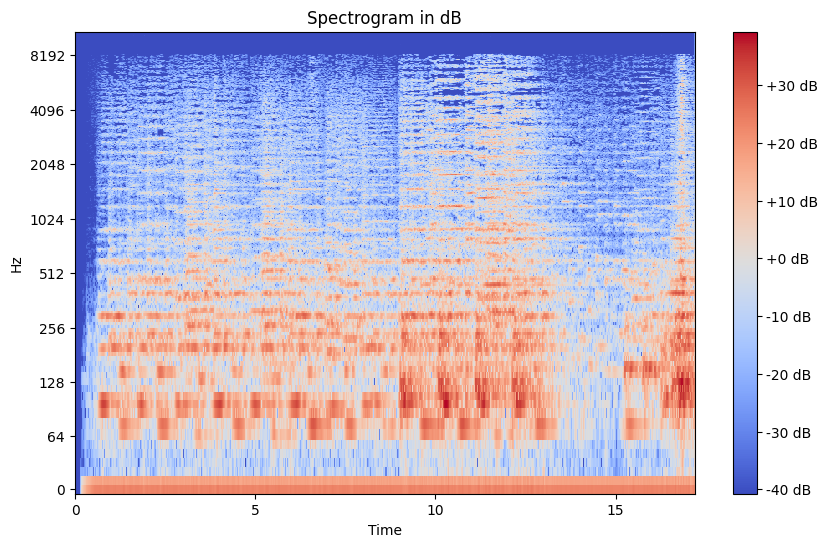

In [3]:
spectrogram = (librosa.core.stft(audio_signal))
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

plt.figure(figsize = (10, 6))
librosa.display.specshow(spectrogram_db, sr = sample_rate, x_axis = 'time', y_axis = 'log')
plt.colorbar(format = '%+2.0f dB')
plt.title('Spectrogram in dB')
plt.show()

#### c) Calculate the constant-Q spectrogram

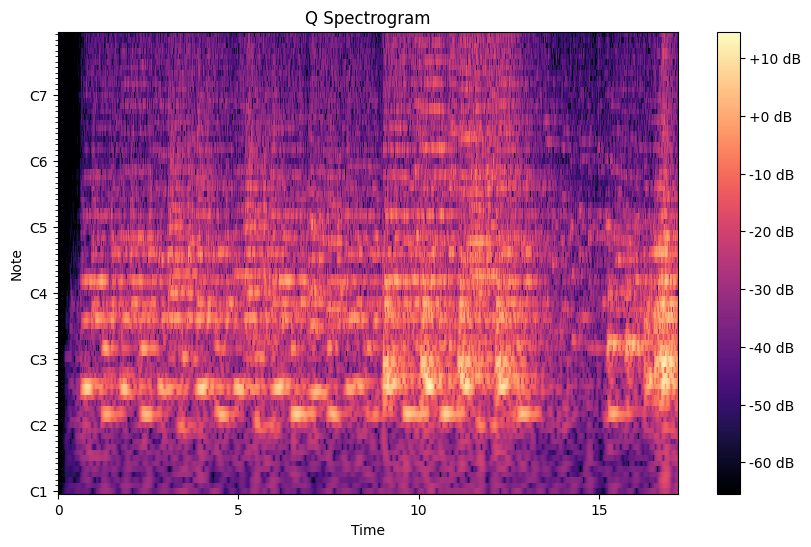

In [4]:
constant_Q_spectrogram = librosa.core.cqt(audio_signal, sr = sample_rate)
constant_Q_spectrogram_db = librosa.amplitude_to_db(np.abs(constant_Q_spectrogram))

plt.figure(figsize = (10, 6))
librosa.display.specshow(constant_Q_spectrogram_db, sr = sample_rate, x_axis = 'time', y_axis = 'cqt_note')
plt.colorbar(format = '%+2.0f dB')
plt.title('Q Spectrogram')
plt.show()

#### d) Calculate the chromagram

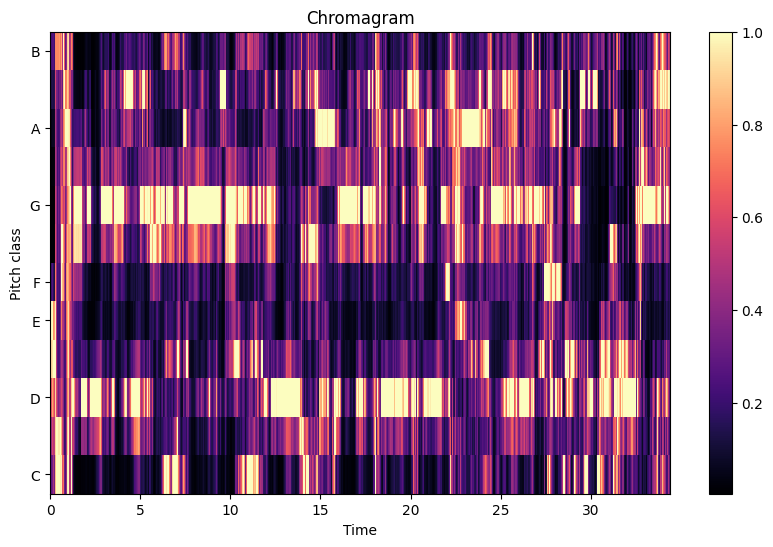

In [5]:
chromagram = librosa.feature.chroma_stft(y = audio_signal, sr = sample_rate, hop_length= 256)

plt.figure(figsize = (10, 6))
librosa.display.specshow(chromagram, sr = sample_rate, x_axis = 'time', y_axis = 'chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()

#### e) Plot, observe and report differences.

Differences are very notable: 
- For the spectrogram, this represents the signal's frequency content over time, and is more useful for a general purpose time-frequency analysis.
- For analysing more "musical" signals, cq-spectrogram is more useful, as it gives a figure similar to the first spectrogram, but highlighting the pitch/note that is being played. As this graph is still continuous, more details like the instrument tone or harmonics/fundamentals being played can be noticed.
- The chromagram can be used for a better "pitch" focused analysis, but as the graph is discrete, some details from the cq-spectrogram are lost. Nevertheless, the notes being played are very distinguishable in this graph.

### 2. Onset detection (1 point)

#### a.1) load the audio file

In [ ]:
audio_signal_2, sample_rate_2 = librosa.load('classic_rock_beat.wav')

Audio signal: [ 0.00128174 -0.00088501  0.00271606 ...  0.          0.
  0.        ]
Sampling rate: 22050


#### a.2) Compute spectral novelty function

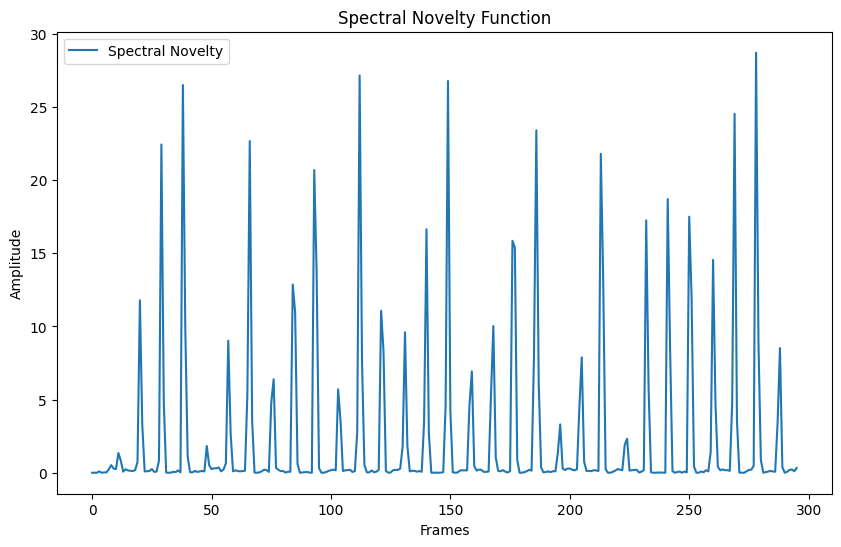

In [26]:
onset_amp = librosa.onset.onset_strength(y=audio_signal_2, sr=sample_rate_2)

plt.figure(figsize=(10, 6))
plt.plot(onset_amp, label='Spectral Novelty')
plt.xlabel('Frames')
plt.ylabel('Amplitude')
plt.title('Spectral Novelty Function')
plt.legend()
plt.show()

#### a.3) Pick peaks

In [27]:
onset_frames = librosa.util.peak_pick(onset_amp, 
                                      pre_max=8, 
                                      post_max=8, 
                                      pre_avg=30, 
                                      post_avg=30, 
                                      delta=0.5, wait=5)

print(f"Onset frames: {onset_frames}")

Onset frames: [ 20  29  38  57  66  76  84  93 103 112 121 131 140 149 159 168 176 186
 196 205 213 232 241 250 260 269 278 288]


#### a.4) Convert frame indexes into time indexes

In [ ]:
onset_time = librosa.frames_to_time(onset_frames, sr=sample_rate_2)

Onset time: [0.46439909 0.67337868 0.88235828 1.32353741 1.53251701 1.76471655
 1.95047619 2.15945578 2.39165533 2.60063492 2.80961451 3.04181406
 3.25079365 3.45977324 3.69197279 3.90095238 4.08671202 4.31891156
 4.55111111 4.7600907  4.94585034 5.38702948 5.59600907 5.80498866
 6.03718821 6.2461678  6.45514739 6.68734694]


#### a.5) Plot onsets on top of the time domain signal. Report observations.

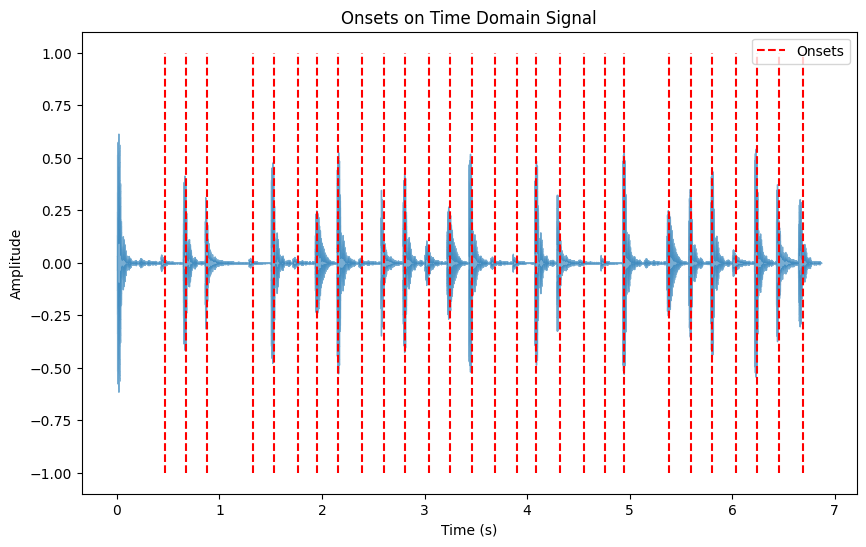

In [29]:
plt.figure(figsize=(10, 6))

librosa.display.waveshow(audio_signal_2, sr=sample_rate_2, alpha=0.6)
plt.vlines(onset_time, -1, 1, 
           color='r', linestyle='--', label='Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Onsets on Time Domain Signal')
plt.legend()
plt.show()

#### a.6) Plot onsets on top of the spectrogram. Report observations.

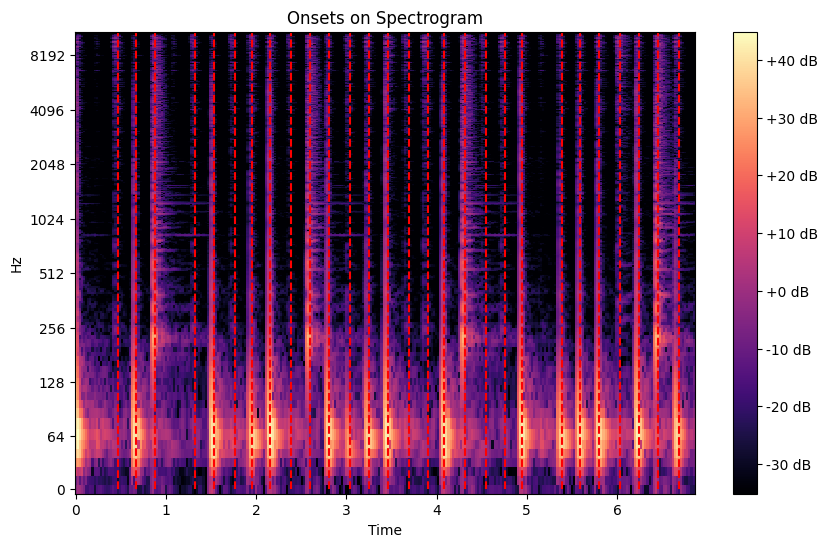

In [30]:
plt.figure(figsize=(10, 6))


spectrogram_db_2 = librosa.amplitude_to_db(np.abs(librosa.core.stft(audio_signal_2)))
librosa.display.specshow(spectrogram_db_2, sr=sample_rate_2, x_axis='time', y_axis='log')

plt.vlines(onset_time, 0, sample_rate_2/2, color='r', linestyle='--', label='Onsets')

plt.colorbar(format='%+2.0f dB')
plt.title('Onsets on Spectrogram')
plt.show()

### Add clicks to the onsets

#### b.1) Create a signal consisting of clicks at specified locations.

In [32]:
signal_length = len(audio_signal_2)
click_signal_2 = librosa.clicks(frames=onset_frames, sr=sample_rate_2, length = signal_length)

#### b.2) Add the two signals together.

In [ ]:
samplewise_sigma_signal = audio_signal_2 + click_signal_2

ic| samplewise_sigma_signal: array([ 0.00128174, -0.00088501,  0.00271606, ...,  0.        ,
                                     0.        ,  0.        ], dtype=float32)


151521


#### b.2) Play it.

In [ ]:
sd.play(samplewise_sigma_signal, sample_rate_2)
sd.wait()

#### b.3) Stack them to create stereo signal.

In [ ]:
stack_sigma_signal = np.vstack([audio_signal_2, click_signal_2]).T

ic| stack_sigma_signal: array([[ 0.00128174,  0.        ],
                               [-0.00088501,  0.        ],
                               [ 0.00271606,  0.        ],
                               ...,
                               [ 0.        ,  0.        ],
                               [ 0.        ,  0.        ],
                               [ 0.        ,  0.        ]], dtype=float32)


151521


#### b.3) Play it.

In [ ]:
sd.play(stack_sigma_signal, sample_rate_2)
sd.wait()

### Bonus problem: Implement your own spectral novelty function